# Matplotlib and Seaborn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Matplotlib
## (1) National Park

**(1.1) Import the dataset <code>park.csv</code>. Show the first five rows.**

In [2]:
park_df = pd.read_csv("../dataset/parks.csv")
park_df.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


**(1.2) Create a subset by selecting national parks in the following five states: CA, CO, UT, AK, WA. Use this subset to solve the next task.**

In [3]:
park_sub = park_df[park_df.State.isin(["CA", "CO", "UT", "AK", "WA"])]
park_sub.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
5,BLCA,Black Canyon of the Gunnison National Park,CO,32950,38.57,-107.72
6,BRCA,Bryce Canyon National Park,UT,35835,37.57,-112.18
7,CANY,Canyonlands National Park,UT,337598,38.20,-109.93
8,CARE,Capitol Reef National Park,UT,241904,38.20,-111.17


**(1.3) Create a figure consisting of two subplots. In the first subplot, use a bar chart to show the count of parks in each state. In the second subplot, use a pie chart to show the total park acreage for each state.**<br>

Setting:
- Title of the first subplot: Number of Parks by State
- Title of the second subplot: Total Park Acreage by State

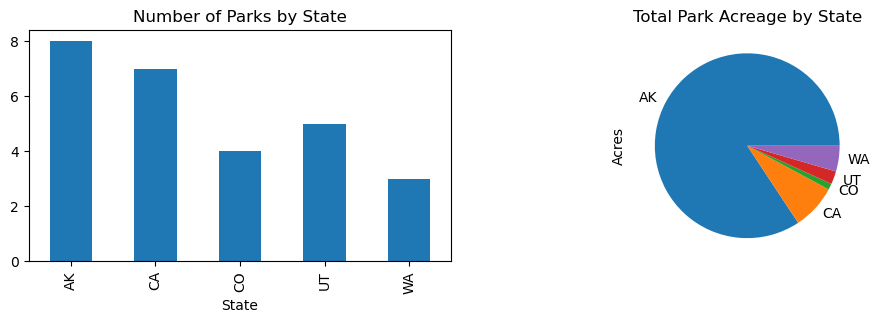

In [4]:
fig, ax = plt.subplots(1, 2, figsize = (12, 3))

park_sub.groupby("State").size().plot(kind = "bar", ax = ax[0])
park_sub.groupby("State").Acres.sum().plot(kind = "pie", ax = ax[1])

ax[0].set_title("Number of Parks by State")
ax[1].set_title("Total Park Acreage by State");

# Seaborn

## (2) Titanic
The sinking of the Titanic is one of the most infamous shipwrecks in history, resulting in the death of 1502 out of 2224 passengers and crew. 
- **class**: Ticket class  (First/Second/Third)
- **who**: sex (man/woman)
- **embarked**: Port of Embarkation 
- **alive**: yes/no

**(2.1) Load the seaborn dataset <code>titanic</code>. Select the following columns and save the subset to a csv file.**<br>
Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html <code>DataFrame.to_csv("filename.csv", index = False)</code>
- class	
- who
- embark_town
- alive

In [5]:
titanic_raw_df = sns.load_dataset("titanic")
titanic_raw_df.loc[:,["class", "who", "embark_town","alive"]].to_csv("titanic.csv", index = False)

**(2.2) Import the dataset you saved in (2.1) and use it to complete the following tasks.** 

In [6]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head(5)

,class,who,embark_town,alive
0,Third,man,Southampton,no
1,First,woman,Cherbourg,yes
2,Third,woman,Southampton,yes
3,First,woman,Southampton,yes
4,Third,man,Southampton,no


**(2.3) Create a count plot to show the number of passengers in each group (man/woman/child).**<br>
Hint: Column <code>who</code>

<Axes: xlabel='who', ylabel='count'>

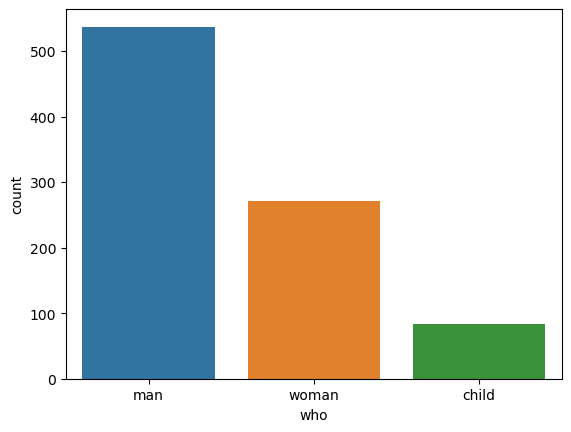

In [7]:
# solution-1
sns.countplot(data = titanic_df, x = "who")

<Axes: >

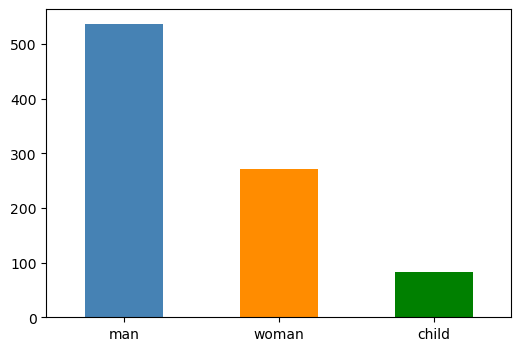

In [8]:
# solution-2 (without using seaborn)
wide_df = titanic_df["who"].value_counts()
wide_df.plot(kind = "bar", 
             color = ["steelblue", "darkorange", "green"], 
             figsize = (6, 4), 
             rot = 0)                        # rot = 0 is used to specify the rotation angle for the x-tick labels 

**(2.4) Create a count plot to show the number of passengers in each group (man/woman/child). Additionally, different colored sub-bars are used to represent the number of passengers who survived and did not survive in each group.** 

<Axes: xlabel='who', ylabel='count'>

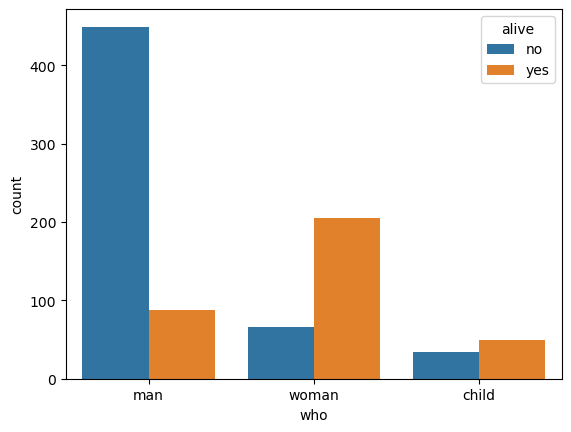

In [9]:
sns.countplot(data = titanic_df, x = "who", hue = "alive")

- **Question**: Among the different passenger groups (man/woman/child), which one exhibits the lowest survival rate?
- **Answer**: Male passengers have the lowest survival rate.

**(2.5) Use a contingency table to display the numbers in (2.4).**<br>
Expected result:

|alive<br>who|no|yes|
|:-:|:-:|:-:|
|**child**|34|49|
|**man**|449|88|
|**woman**|66|205|

In [10]:
titanic_ct = pd.crosstab(titanic_df["who"], titanic_df["alive"])
titanic_ct

alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


**(2.6) Use a heatmap to display the result in (2.5).**<br>
Setting: <code>cmap = "GnBu"</code>

<Axes: xlabel='alive', ylabel='who'>

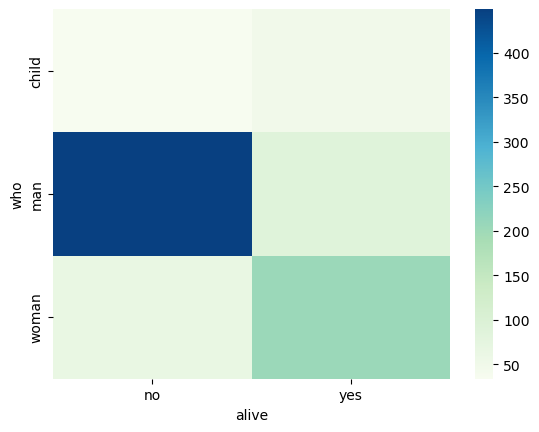

In [11]:
sns.heatmap(data = titanic_ct, cmap = "GnBu")

**(2.7) Use three subplots to compare the survival of passengers in the following three groups: class = First, Class = Second, class = Third. In each subplot, draw two bars, each representing the number of surviving and non-surviving passengers.**<br>
Hint: <br>
<code>g = sns.FacetGrid(data =     , col = "   " )</code><br>
<code>g.map(sns.countplot, "    ", order = ["yes","no"])</code>

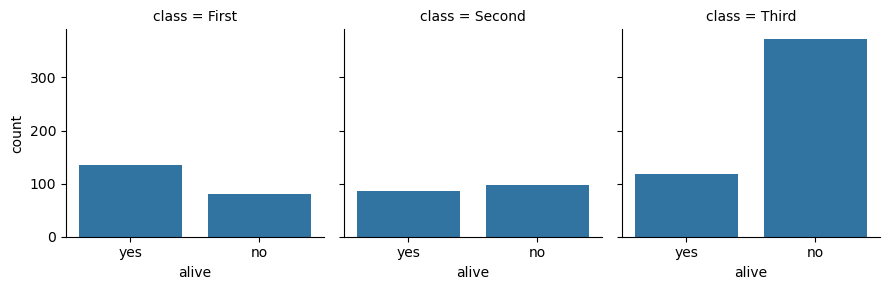

In [12]:
# parameter "col_order": Specify the order of subplots
# parameter "order": Specify the order of the bars
g = sns.FacetGrid(data = titanic_df, col = "class", col_order=["First", "Second", "Third"])
g.map(sns.countplot, "alive", order = ["yes","no"])

## (3) Diamond

**(3.1) Load the seaborn dataset <code>diamonds</code>. Show a summary that includes the column names and their corresponding data types.** 

In [13]:
diamond_df = sns.load_dataset("diamonds")
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


**(3.2) Use a count plot to visualize the number of diamonds in each <code>color</code> category**.

<Axes: xlabel='color', ylabel='count'>

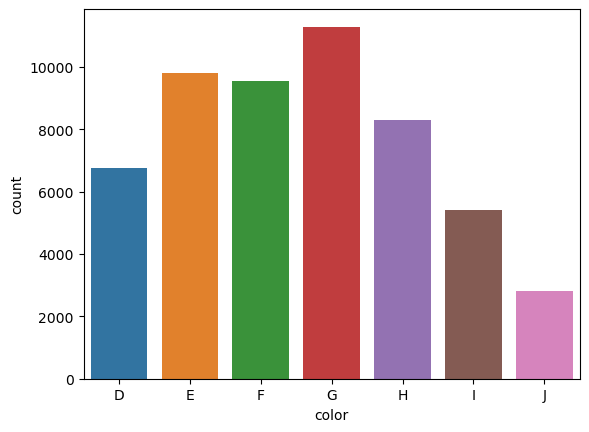

In [14]:
sns.countplot(data = diamond_df, x = "color")

**(3.3) Calculate the average price for each <code>cut</code> category within each <code>color</code> category. Round the numbers to two decimal places.**<br>
Expected result:

|color<br>cut|D|E|...|...|J|
|--:|--:|--:|--:|--:|--:|
|**Ideal**|2629.09|...|...|...|...|
|**Premium**|...|...|...|...|...|
|**Very Good**|...|...|...|...|...|
|**Good**|...|...|...|...|...|
|**Fair**|...|...|...|...|...|

In [15]:
avg_price = diamond_df.pivot_table(index = "cut", columns = "color", values = "price", aggfunc = "mean").round(2)
avg_price

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2629.09,2597.55,3374.94,3720.71,3889.33,4451.97,4918.19
Premium,3631.29,3538.91,4324.89,4500.74,5216.71,5946.18,6294.59
Very Good,3470.47,3214.65,3778.82,3872.75,4535.39,5255.88,5103.51
Good,3405.38,3423.64,3495.75,4123.48,4276.25,5078.53,4574.17
Fair,4291.06,3682.31,3827.00,4239.25,5135.68,4685.45,4975.66


**(3.4) Use a heatmap to display the result obtained in (3.3). Answer the folllowing question in the markdown cell.**

<Axes: xlabel='color', ylabel='cut'>

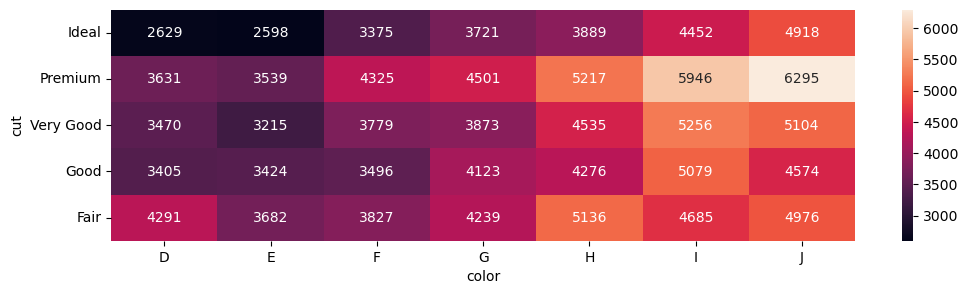

In [16]:
plt.figure(figsize = (12,3))                        # Create a new figure with a specific size for plotting
sns.heatmap(avg_price, annot = True, fmt = ".0f")   # You can use ".0f" to display only the integer part

- **Question**: Within this dataset of diamonds, which combination of "cut" category and "color" category exhibits the highest average price?
- **Answer**: The diamonds with a premium cut and a color scale of J exhibit the highest average price.  

**(3.5) Create a subset by selecting the data with color scale "I" and "premium" cut. Display the price distribution using a histogram.**

<Axes: xlabel='price', ylabel='Count'>

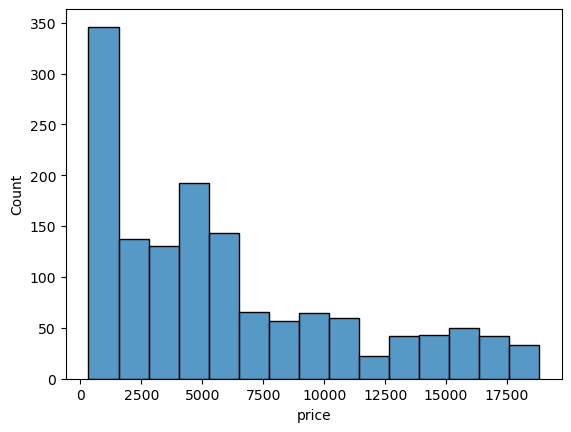

In [17]:
i_premium = diamond_df[ (diamond_df.color == "I") & (diamond_df.cut == "Premium")]
sns.histplot(i_premium, x = "price")

**(3.6) Use the subset obtained in (3.5) to show the relationship between <code>carat</code> and <code>price</code> in a scatter plot.**

<Axes: xlabel='carat', ylabel='price'>

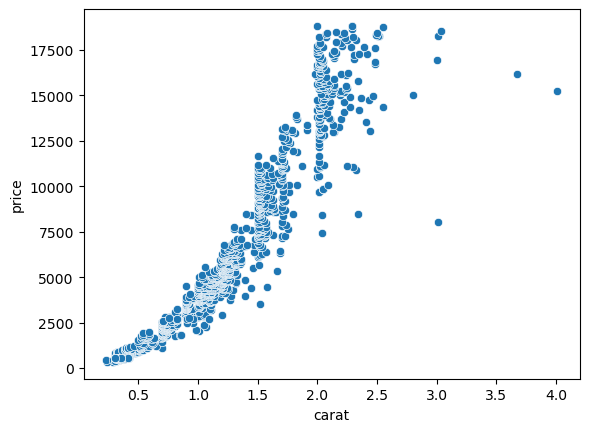

In [18]:
sns.scatterplot(i_premium, x = "carat", y = "price")

**(3.7) Using the subset obtained in (3.5), create a joint plot showing the relationship between carat and price, and their individual distribution.**

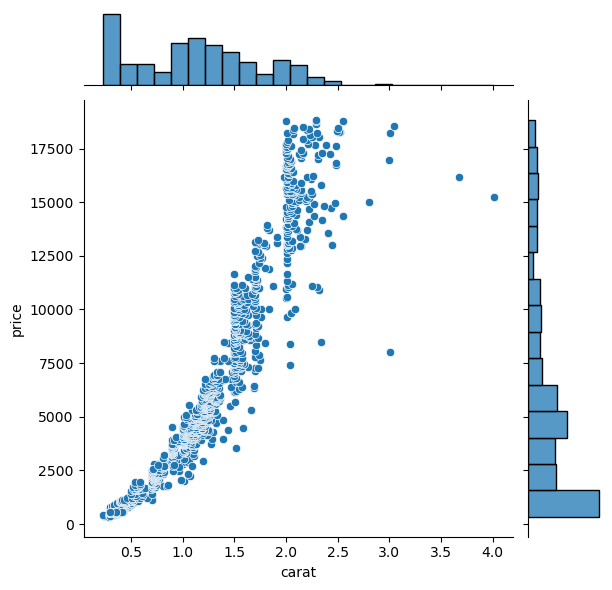

In [19]:
sns.jointplot(i_premium, x = "carat", y = "price")

**(3.8) Shows the relationship between <code>carat</code> and <code>price</code> for each <code>cut</code> category.**<br>
Hint: The figure should contain 5 subplots.

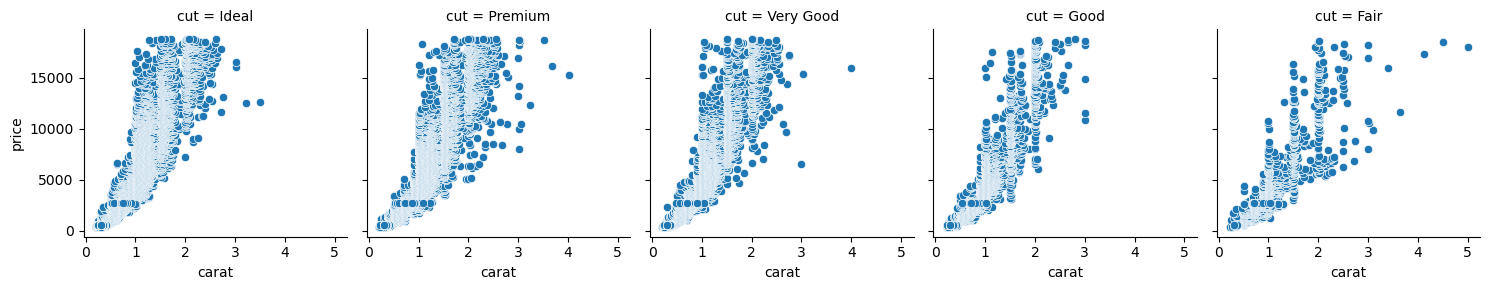

In [20]:
g = sns.FacetGrid(diamond_df, col = "cut")
g.map(sns.scatterplot, "carat", "price")